# Rheology Examples #

In [2]:
import gdmate as gd
import matplotlib.pyplot as plt
import numpy as np

### Calculate Conductive Geotherm ###

The function `cond_geotherm` calculates the conductive temperatures at a series of depths based on the model from Chapman 1986. In the calculations, the lithosphere is treated as a sequence of discrete layers with varying thicknesses and radiogenic heat production. The parameters for the function are as follows (default values are in parentheses):

- `thicknesses`:  List containing the thicknesses (km) of each layer of the lithosphere (default: [20, 20, 60])
- `depth`:  Maximum depth of the model (km), which can extend below lithosphere (default: 600)
- `radiogenic_heat`:  List containing the radiogenic heat production (W/m^3) of each unit (default: [1.e-6, 2.5e-7, 0.])
- `surface_t`:  Surface temperature (K) (default: 273)
- `heat_flow`:  Surface heat flow (W/m^3) (default: 0.05296)
- `thermal_conductivity`:  Thermal conductivity for all lithospheric units (W/m*K) (default: 2.5)

This function returns:
- `boundary_temps`: Numpy array of conductive temperatures (K) at each layer boundary
- `boundary_heat_flows`: Numpy array of heat flows (W/m^3) at each layer boundary
- `z`: Numpy array of depths (m) at which temperatures were calculated
- `cond_temps`: Numpy array of temperatures (K) at each depth in z

Note that all arrays are ordered starting from values closest to the surface and ending with values at the maximum depth.

If you pass nothing to `cond_geotherm`, it will run using its default parameters:

In [6]:
# Running cond_geotherm
boundary_temps, boundary_heat_flows, z, cond_temps = gd.rheology.cond_geotherm()

# Printing the first 3 results from cond_geotherm
print("Temperatures at layer boundaries:")
print(boundary_temps)
print("Heat flows at layer boundaries:")
print(boundary_heat_flows)
print("Array of depths: ")
print(z)

Temperatures at layer boundaries:
[ 273.    616.68  860.36 1531.4 ]
Heat flows at layer boundaries:
[0.05296 0.03296 0.02796 0.02796]
Array of depths: 
[     0   1000   2000   3000   4000   5000   6000   7000   8000   9000
  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000
  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000
  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000
  40000  41000  42000  43000  44000  45000  46000  47000  48000  49000
  50000  51000  52000  53000  54000  55000  56000  57000  58000  59000
  60000  61000  62000  63000  64000  65000  66000  67000  68000  69000
  70000  71000  72000  73000  74000  75000  76000  77000  78000  79000
  80000  81000  82000  83000  84000  85000  86000  87000  88000  89000
  90000  91000  92000  93000  94000  95000  96000  97000  98000  99000
 100000 101000 102000 103000 104000 105000 106000 107000 108000 109000
 110000 111000 112000 113000 114000 115000 116000 117000 118000 119

In [7]:
# Printing the final piece of output from cond_geotherm
print("Conductive temperatures at each depth:")
print(cond_temps)

Conductive temperatures at each depth:
[ 273.     293.984  314.568  334.752  354.536  373.92   392.904  411.488
  429.672  447.456  464.84   481.824  498.408  514.592  530.376  545.76
  560.744  575.328  589.512  603.296  616.68   629.814  642.848  655.782
  668.616  681.35   693.984  706.518  718.952  731.286  743.52   755.654
  767.688  779.622  791.456  803.19   814.824  826.358  837.792  849.126
  860.36   871.544  882.728  893.912  905.096  916.28   927.464  938.648
  949.832  961.016  972.2    983.384  994.568 1005.752 1016.936 1028.12
 1039.304 1050.488 1061.672 1072.856 1084.04  1095.224 1106.408 1117.592
 1128.776 1139.96  1151.144 1162.328 1173.512 1184.696 1195.88  1207.064
 1218.248 1229.432 1240.616 1251.8   1262.984 1274.168 1285.352 1296.536
 1307.72  1318.904 1330.088 1341.272 1352.456 1363.64  1374.824 1386.008
 1397.192 1408.376 1419.56  1430.744 1441.928 1453.112 1464.296 1475.48
 1486.664 1497.848 1509.032 1520.216 1531.4   1531.4   1531.4   1531.4
 1531.4   1531.4 

As seen above, the arrays z and cond_temps can easily get very long. It can be helpful to visualize the data from cond_geotherm by graphing it:

Text(0, 0.5, 'Depth (km)')

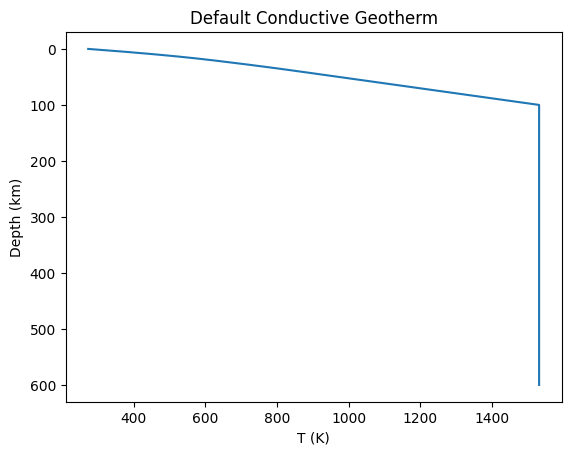

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cond_temps, z / 1000)
ax.invert_yaxis()
ax.set_title("Default Conductive Geotherm")
ax.set_xlabel('T (K)')
ax.set_ylabel('Depth (km)')

Notably, when `cond_geotherm` extends beyond the depth of the lithosphere (i.e, beyond the last inputted layer), the temperature of the asthenosphere is made constant. To actually calculate the temperatures at those depths, we'll need to use the function `adiab_geotherm`. However, if we only want the temperatures for the lithosphere, we can rerun `cond_geotherm` on a shallower depth to avoid dealing with the unnecessary values at the end of the `z` and `cond_temps` arrays:

In [11]:
# Rerun cond_geotherm with a non-default depth
boundary_temps, boundary_heat_flows, z, cond_temps = gd.rheology.cond_geotherm(depth=100)

# Printing the first 3 return values
print("Temperatures at layer boundaries:")
print(boundary_temps)
print("Heat flows at layer boundaries:")
print(boundary_heat_flows)
print("Array of depths: ")
print(z)

Temperatures at layer boundaries:
[ 273.    616.68  860.36 1531.4 ]
Heat flows at layer boundaries:
[0.05296 0.03296 0.02796 0.02796]
Array of depths: 
[     0   1000   2000   3000   4000   5000   6000   7000   8000   9000
  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000
  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000
  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000
  40000  41000  42000  43000  44000  45000  46000  47000  48000  49000
  50000  51000  52000  53000  54000  55000  56000  57000  58000  59000
  60000  61000  62000  63000  64000  65000  66000  67000  68000  69000
  70000  71000  72000  73000  74000  75000  76000  77000  78000  79000
  80000  81000  82000  83000  84000  85000  86000  87000  88000  89000
  90000  91000  92000  93000  94000  95000  96000  97000  98000  99000
 100000]
Array of temperatures: 
[ 273.     293.984  314.568  334.752  354.536  373.92   392.904  411.488
  429.672  447.456  464.84   481

In [12]:
# Printing the calculated temperatures

print("Array of temperatures: ")
print(cond_temps)

Array of temperatures: 
[ 273.     293.984  314.568  334.752  354.536  373.92   392.904  411.488
  429.672  447.456  464.84   481.824  498.408  514.592  530.376  545.76
  560.744  575.328  589.512  603.296  616.68   629.814  642.848  655.782
  668.616  681.35   693.984  706.518  718.952  731.286  743.52   755.654
  767.688  779.622  791.456  803.19   814.824  826.358  837.792  849.126
  860.36   871.544  882.728  893.912  905.096  916.28   927.464  938.648
  949.832  961.016  972.2    983.384  994.568 1005.752 1016.936 1028.12
 1039.304 1050.488 1061.672 1072.856 1084.04  1095.224 1106.408 1117.592
 1128.776 1139.96  1151.144 1162.328 1173.512 1184.696 1195.88  1207.064
 1218.248 1229.432 1240.616 1251.8   1262.984 1274.168 1285.352 1296.536
 1307.72  1318.904 1330.088 1341.272 1352.456 1363.64  1374.824 1386.008
 1397.192 1408.376 1419.56  1430.744 1441.928 1453.112 1464.296 1475.48
 1486.664 1497.848 1509.032 1520.216 1531.4  ]


Since the layer thicknesses and radiogenic heat productions remain unchanged, the temperatures and heat flows at layer boundaries remain the same. However, now that the maximum depth is only 100 km, `z` and `cond_temps` are much shorter, and `cond_temps` no longer contains duplicate values at the end.

Now, let's graph the new lithospheric geotherm to confirm that the model ran properly:

Text(0, 0.5, 'Depth (km)')

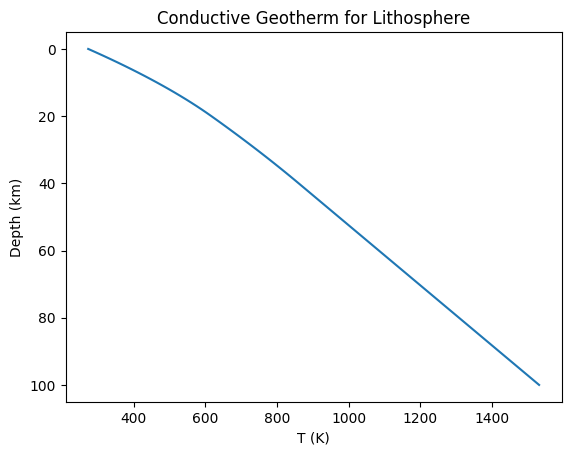

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cond_temps, z / 1000)
ax.invert_yaxis()
ax.set_title("Conductive Geotherm for Lithosphere")
ax.set_xlabel('T (K)')
ax.set_ylabel('Depth (km)')

As expected, this graph has a much smaller range of depths and lacks the vertical line found when measuring the temperature of the asthenosphere.

### Calculate Adiabatic Geotherm ###

Once we have a conductive geotherm from `cond_geotherm`, we often want to also find the adiabatic geotherm so that we can get a better idea of the temperatures in the asthenosphere. To do this, we can use the function `adiab_geotherm`, which takes the following parameters:
- z: Numpy array of depths (in meters), which will usually be taken from the `z` produced by `cond_geotherm`. Note that this parameter does NOT have a default value
- ast: Adiabatic surface temperature (K) (default: 1573)
- gravity: Gravitational acceleration (m/s^-2) (default: 9.81)
- thermal_expansivity: Thermal expansivity of asthenosphere (K^-1) (default: 2.e-5)
- heat capacity: Heat capacity of asthenosphere (J/K*kg) (default: 750)
- depth: Maximum depth of model (km). This value should be the same as the depth used in cond_geotherm() and should equal the last value in z divided by 1000 (since depth and z have different units). (default: 600)
    
Based on these parameters, `adiab_geotherm` returns just one array:
- adiab_temps: Numpy array conductive temperatures (K) at each depth given in z.

In [16]:
# First, we need to re-run cond_geotherm to get an array z for adiab_geotherm
boundary_temps, boundary_heat_flows, z, cond_temps = gd.rheology.cond_geotherm()

# Now, let's use z to run adiab_geotherm. 
# For the other parameters, we'll just use the default values 
# (the defaults for adiab_geotherm line up with the defaults for cond_geotherm)
adiab_temps = gd.rheology.adiab_geotherm(z)
print("Adiabatic temperatures: ")
print(adiab_temps)

Adiabatic temperatures: 
[1573.         1573.4114968  1573.82310125 1574.23481337 1574.6466332
 1575.05856076 1575.47059608 1575.88273918 1576.29499011 1576.70734888
 1577.11981552 1577.53239006 1577.94507254 1578.35786297 1578.77076139
 1579.18376782 1579.59688229 1580.01010484 1580.42343548 1580.83687425
 1581.25042118 1581.66407629 1582.07783961 1582.49171117 1582.905691
 1583.31977913 1583.73397559 1584.14828039 1584.56269358 1584.97721518
 1585.39184522 1585.80658373 1586.22143073 1586.63638626 1587.05145034
 1587.466623   1587.88190427 1588.29729417 1588.71279274 1589.12840001
 1589.544116   1589.95994074 1590.37587426 1590.79191659 1591.20806776
 1591.62432779 1592.04069671 1592.45717456 1592.87376135 1593.29045713
 1593.70726191 1594.12417573 1594.54119862 1594.95833059 1595.37557169
 1595.79292194 1596.21038137 1596.62795001 1597.04562788 1597.46341502
 1597.88131144 1598.2993172  1598.7174323  1599.13565678 1599.55399067
 1599.97243399 1600.39098678 1600.80964906 1601.2284208

Let's visualize this data again with a new graph

Text(0, 0.5, 'Depth (km)')

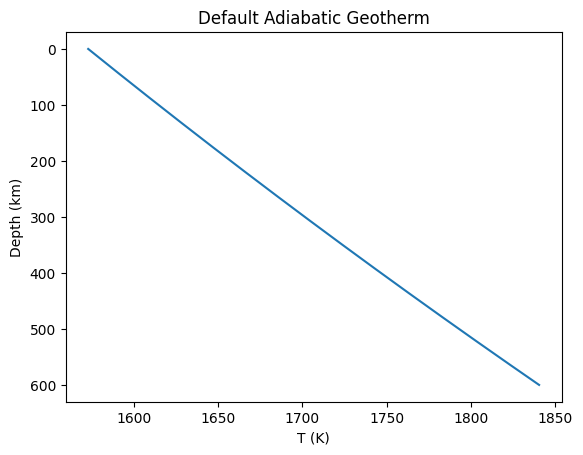

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(adiab_temps, z / 1000) # We can still use z for our x-axis
ax.invert_yaxis()
ax.set_title("Default Adiabatic Geotherm")
ax.set_xlabel('T (K)')
ax.set_ylabel('Depth (km)')

This graph looks fairly reasonable for the asthenosphere, but the model's temperature estimates for the lithosphere are clearly too high. We can avoid this problem by using the `geotherm` function.

### Calculate Combined Geotherm ###

The `geotherm` function calculates the combined conductive and adiabatic geotherm by combining the results of `cond_geotherm` and `adiab_geotherm`. With this function, it is possible to produce a geotherm that works for both the lithosphere and the asthenosphere.

This function takes all of the parameters that `cond_geotherm` takes, plus all of the parameters that `adiab_geotherm` takes (excluding `z`). Note that the defaults for these parameters for `geotherm` are the same as their defaults for their original functions. [TODO - Discuss other params if we keep them, then provide example. Also discuss what function returns]